In [1]:
'''

Defining the N-Body problem and universal constants and defining numerical method functions such as RK4, f_true(), and the IVP

'''

import numpy as np


#Constants
Me = 5.97219e24
Msun= 1.989e30
Mmercury = 3.302e23
G = 6.6743e-11
AU = 1.496e11

    
#f-true for Gravtiational force of a n body problem   
def f_true(u_k,index,u_k_l,masses):
    r1 = np.array([u_k[0],u_k[1],u_k[2]]) #position vector of current body

    atot = np.zeros(3)#acceleration vector

    for i in range(len(u_k_l)):
        if i==index:#do no want to do the sum of the force of the body on itself
            continue
        r2 = np.array([u_k_l[i][0],u_k_l[i][1],u_k_l[i][2]])#position vector of second body
        rddot = (G*masses[i]/(np.linalg.norm(r2-r1)**3))*(r2-r1)#acceleration due to the second body    
        atot+=rddot #finding the total acceleration from the n bodies
    u_dot = np.array([u_k[3], u_k[4],u_k[5],atot[0],atot[1],atot[2]])#new udot state vector of the problem
    return u_dot



#based off previous HWS (Individual HW) to reurn the following state vector
def rk4(u_k,index, u_k_l, delta_t,masses):
    y1 = f_true(u_k, index, u_k_l,masses)
    y2 = f_true(u_k+(0.5*delta_t*y1), index, u_k_l,masses)
    y3 = f_true(u_k+(0.5*delta_t*y2), index, u_k_l,masses)
    y4 = f_true(u_k+(1*delta_t*y3), index, u_k_l,masses)
    u_kplus1 = u_k + (1/6)*delta_t*(y1+(2*y2)+(2*y3)+y4)
    return u_kplus1


def ivp_rk4(uk,delta_t):
    
    for i in range(times):

        current_body = uk[i]#finds the current body we will plotting the position of
        update = []

        for j in range(len(current_body)):
            update.append(rk4(current_body[j],j,current_body,delta_t,masses)) #appending the current state vector of the body
        update = np.array(update)
        uk.append(update)#adding it to list of state vectors
    uk = np.array(uk)#converting from list to a np array
    return uk






C:\Users\Yair\AppData\Local\Temp\ipykernel_39128\763964032.py:77: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


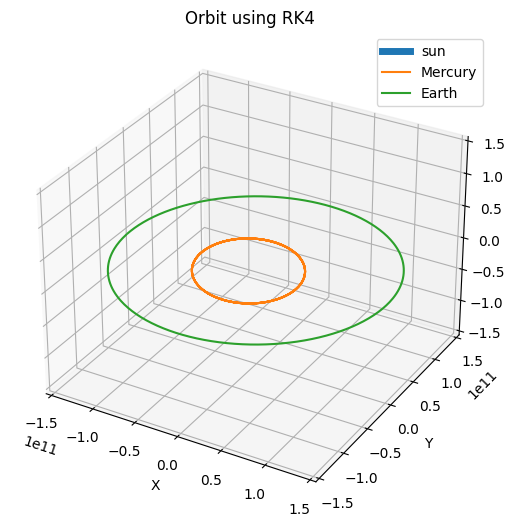

In [2]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

'''

Plotting the Results of the n-body problem on a 3d axis

'''


# defining my inputs
u_state = np.array([[0,0,0,0,0,0], #state vector of the sun, defining it as the origin
                 [3.563506782290696E+10,3.148559841833627E+10,-6.956085946746450E+08,
  -4.185782548291049E+04,3.858067127878544E+04,6.992218522396076E+03], # mercury state vector
  [-1.486812295797899E+11,-1.236415467455933E+10,1.278505860398524E+06,
 1.994231032978342E+03,-2.980682086807981E+04,5.054675728022318E-01]#state vector of the earth
 ]) 
delta_t = 24*60*60 # 1 day in seconds
T=365.25636*24*60*60 #a  year in seconds


masses = np.array([Msun,Mmercury,Me])
names = ['sun','Mercury','Earth']

u = [u_state] # list of updated values 

times = int(T/delta_t)


u_f = ivp_rk4(u,delta_t) # final state vector of the position







#finding the positions of all the bodies (Sun, Mercury, Earth)
xs,ys,zs=[],[],[]
for i in range(times):
    xs.append(u_f[i][0][0])
    ys.append(u_f[i][0][1])
    zs.append(u_f[i][0][2])

x,y,z=[],[],[]
for i in range(times):
    x.append(u_f[i][1][0])
    y.append(u_f[i][1][1])
    z.append(u_f[i][1][2])

xm,ym,zm=[],[],[]
for i in range(times):
    xm.append(u_f[i][2][0])
    ym.append(u_f[i][2][1])
    zm.append(u_f[i][2][2])


#X,Y,Z of the earth
x = np.array(x)
y = np.array(y)
z= np.array(z)

#X,Y,Z of the Sun
xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)

#X,Y,Z of Mercury
xm = np.array(xm)
ym = np.array(ym)
zm = np.array(zm)


#plotting orbits
fig = plt.figure()
ax = p3.Axes3D(fig)



plt.plot(xs,ys,zs,label=names[0],linewidth=5)

plt.plot(x,y,z,label=names[1])

plt.plot(xm,ym,zm,label=names[2])

ax.set_xlim(-max(xm),max(xm))
ax.set_ylim(-max(xm),max(xm))
ax.set_zlim(-max(xm),max(xm))


plt.title("Orbit using RK4")
plt.xlabel("X")
plt.ylabel("Y")





plt.legend()
plt.savefig('Orbits.png')


plt.show()




In [3]:
def Rk4_Error(u, T, delta_t,u_baseline):

    #error func for list of delta_t against delta_t_baseline (1 day in seconds)
    
    u1 = ivp_rk4(u,delta_t)
    u2 = u_baseline
    
    u1 = [num for sublist in u1 for num in sublist]
    u2 = [num for sublist in u2 for num in sublist]

   
    u1final = u1[-1]
    u2final = u2[-1]
    udiff = u1final - u2final
    

    err = np.linalg.norm(udiff)/np.linalg.norm(u2)
    
    return err




In [4]:

dtb = delta_t
day = 24*60*60

#list of delta_t values to prove convergence and justify choice for delta_t_basline
dtl = np.logspace(-7,5,8)*day
rk4_err=[]
for i in dtl:
    print(i)
    error = Rk4_Error(u, T, i,u_f)

    rk4_err.append(error)




0.00864
0.44750661228557675
23.17849167121682
1200.5241071383896
62180.84214729948
3220640.9743521065
166812283.77551243
8640000000.0


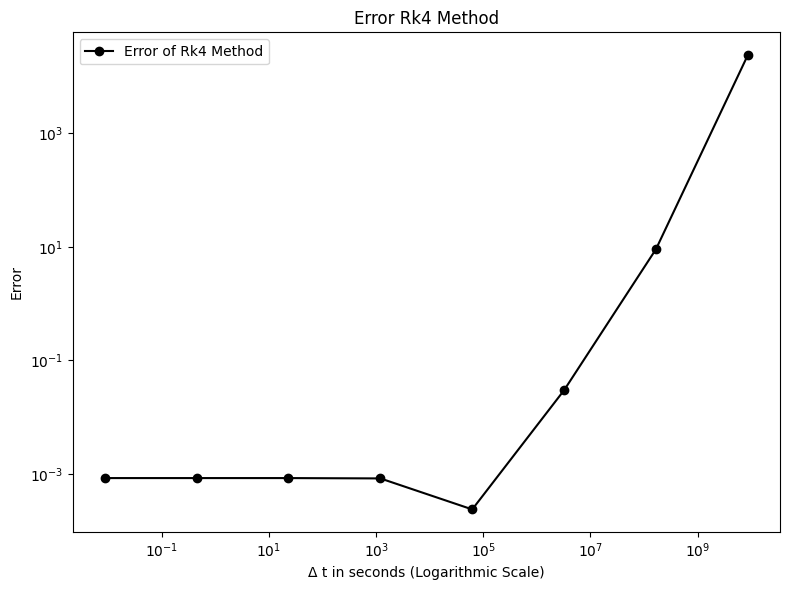

[ 2.79759622e-06 -6.55967176e+01]


In [5]:
#plot of the error of RK4
fig = plt.figure(figsize=(8,6),tight_layout=True)


plt.plot(dtl,rk4_err,'k-o', label = 'Error of Rk4 Method')
plt.title("Error Rk4 Method")
plt.xlabel("\u0394 t in seconds (Logarithmic Scale)")
plt.ylabel("Error")
plt.yscale('log')
plt.xscale('log')


plt.legend()
plt.show()


#plt.savefig('Error-Graph.png')


print(np.polyfit(dtl,rk4_err,1))



In [6]:
#reading the JPL excel data of the earth to compare to Numerical Method
import pandas as pd

dataframe1 = pd.read_excel('JPL Data.xlsx')
 


Earth = pd.read_excel('JPL Data.xlsx', 
                        sheet_name = 0, 
                        index_col = 0)


xpos,ypos,zpos = [],[],[] 

vxpos,vypos,vzpos = [],[],[]

for i in range(len(Earth)):
    for j in range(len(Earth.columns)):
        if Earth.iloc[i,j]=='X':
            xpos.append(Earth.iloc[i,j+1])
        if Earth.iloc[i,j]=='Y':
            ypos.append(Earth.iloc[i,j+1])
        if Earth.iloc[i,j]=='Z':
            zpos.append(Earth.iloc[i,j+1])
        if Earth.iloc[i,j]=='VX':
            vxpos.append(Earth.iloc[i,j+1])
        if Earth.iloc[i,j]=='VY':
            vypos.append(Earth.iloc[i,j+1])
        if Earth.iloc[i,j]=='VZ':
            vzpos.append(Earth.iloc[i,j+1])




U_jpl = []

for i in range(len(xpos)):
    u_temp = np.array([xpos[i],ypos[i],zpos[i],vxpos[i],vypos[i],vzpos[i]])*10**3#Converting units to m instead of km
    U_jpl.append(u_temp)

U_jpl = np.array(U_jpl) #final state vecotr of the earth from JPL Data



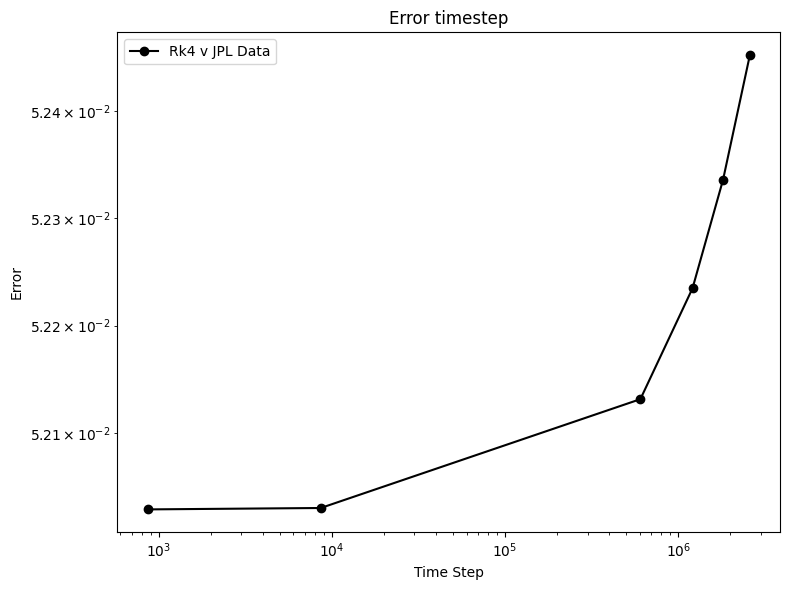

In [7]:
def error_rk4(delta_t_l,u):

    #Error function for Rk4

    err_for_rk4=[]
    for i in delta_t_l:

        u1 = ivp_rk4(u,i)
        u2 = U_jpl
        
        u1 = [num for sublist in u1 for num in sublist]
        u2 = [num for sublist in u2 for num in sublist]

        
        u1final = u1[-1]
        u2final = u2[-1]
        udiff = u1final - u2final
        


        norm1 = np.linalg.norm(udiff)
        norm2 = np.linalg.norm(u2)
        
        err = norm1/norm2
        err_for_rk4.append(err)
    return err_for_rk4


day = 24*60*60
dtl = np.array([day/100,day/10,7*day,14*day,21*day,30*day])
err__for_rk4 = error_rk4(dtl,u)



fig = plt.figure(figsize=(8,6),tight_layout=True)


plt.plot(dtl,err__for_rk4,'k-o', label = 'Rk4 v JPL Data')
plt.title("Error timestep")
plt.xlabel("Time Step")
plt.ylabel("Error")
plt.yscale('log')
plt.xscale('log')

#plt.savefig('JPL_Error_Graph.png')

plt.legend()
plt.show()



In [8]:
def forward_euler(u_k,index, u_k_l, delta_t,masses):
    #function for forward euler numerical approximation
 
    u_kplus1 = u_k + delta_t*np.array(f_true(u_k,index,u_k_l,masses))

    return u_kplus1


In [9]:
def ivp_forwardeuler(uf,delta_t):

    #forward euler IVP to find the state vector of the body
    times = int(T/delta_t)
    for i in range(times):

        current_body = uf[i]#finds the current body we will plotting the position of
        update = []

        for j in range(len(current_body)):
            update.append(forward_euler(current_body[j],j,current_body,delta_t,masses)) #appending the current state vector of the body
        update = np.array(update)
        uf.append(update)#adding it to list of state vectors
    uf = np.array(uf)#converting from list to a np array
    return uf


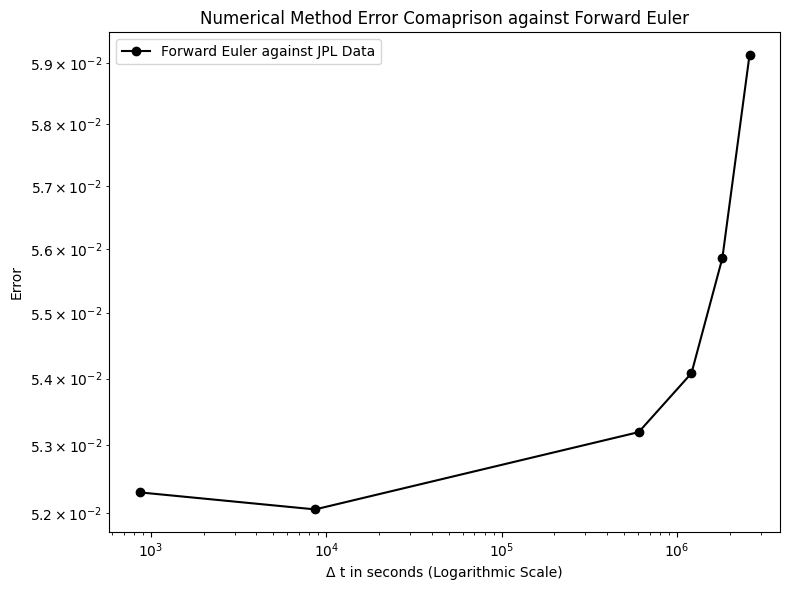

In [10]:
def error_forward_euler(delta_t_l,u):

    #error for forward euler
    
    err_for_eul=[]
    for i in delta_t_l:

        u1 = ivp_forwardeuler(u,i)
        u2 = U_jpl
        
        u1 = [num for sublist in u1 for num in sublist]
        u2 = [num for sublist in u2 for num in sublist]

        
        u1final = u1[-1]
        u2final = u2[-1]
        udiff = u1final - u2final
        


        norm1 = np.linalg.norm(udiff)
        norm2 = np.linalg.norm(u2)
        
        err = norm1/norm2
        err_for_eul.append(err)
    return err_for_eul







#day = 24*60*60
#dtl = np.array([day/100,day/10,7*day,14*day,21*day,30*day])

err_for_eul = error_forward_euler(dtl,u)


fig = plt.figure(figsize=(8,6),tight_layout=True)


plt.plot(dtl,err_for_eul,'k-o', label = 'Forward Euler against JPL Data')
plt.title("Numerical Method Error Comaprison against Forward Euler")
plt.xlabel("\u0394 t in seconds (Logarithmic Scale)")
plt.ylabel("Error")
plt.yscale('log')
plt.xscale('log')

#plt.savefig('JPL_Error_Graph.png')

plt.legend()
plt.show()



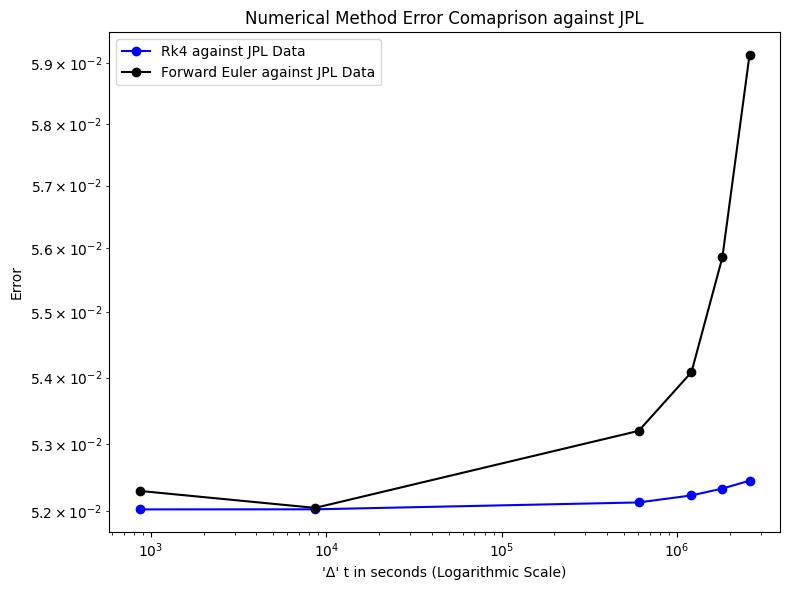

In [11]:
fig = plt.figure(figsize=(8,6),tight_layout=True)


plt.plot(dtl,err__for_rk4,'b-o', label = 'Rk4 against JPL Data')
plt.plot(dtl,err_for_eul,'k-o', label = 'Forward Euler against JPL Data')

plt.title("Numerical Method Error Comaprison against JPL")
plt.xlabel("'\u0394' t in seconds (Logarithmic Scale)")
plt.ylabel("Error")
plt.yscale('log')
plt.xscale('log')

#plt.savefig('JPL_Error_Graph.png')

plt.legend()
plt.show()